In [1]:
from tools import get_input
import numpy as np

data, data_test = get_input(18)
len(data), len(data_test)

(676, 14)

## Part 1

### 1.1 Basic greedy approach, 13s on full dataset

In [2]:
def get_border_corners(L, intdir=False):
    pos = (0, 0)
    points = {pos}
    corners = {}
    last_dir = L[-1].split()[0]
    if not intdir:
        last_dir = last_dir.replace('R', '0').replace('L', '2').replace('U', '3').replace('D', '1')

    for line in L:
        dir, n, _ = line.split()
        if not intdir:
            dir = dir.replace('R', '0').replace('L', '2').replace('U', '3').replace('D', '1')
        corners[pos] = (int(last_dir), int(dir))
        n = int(n)
        if dir=='0':       
            for i in range(1, n+1):
                pos = (pos[0], pos[1]+1)
                points.add(pos)
        elif dir=='2':
            for i in range(1, n+1):
                pos = (pos[0], pos[1]-1)
                points.add(pos)
        elif dir=='3':
            for i in range(1, n+1):
                pos = (pos[0]-1, pos[1])
                points.add(pos)
        elif dir=='1':
            for i in range(1, n+1):
                pos = (pos[0]+1, pos[1])
                points.add(pos)
        last_dir = dir
    return points, corners

def get_internal_points_greedy(points):
    '''
    pseudo-Dijkstra greedy algo to find internal points one by one
    '''

    # start from the middle, if we're lucky it's inside 
    i0, j0 = int(sum([p[0] for p in points]) / len(points)), int(sum([p[1] for p in points]) / len(points))
    pints = {(i0, j0)}
    # list of remaining starting internal points to consider
    q = [(i0, j0)]
    while q:
        i, j = q.pop()
        pints.add((i, j))
        next_pt = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        for p in next_pt:
            if (p not in pints) and (p not in points) and (p not in q):
                q.append(p)
    return pints

L = data
points, corners = get_border_corners(L)
internal_points = get_internal_points_greedy(points)
print(len(points), len(internal_points))
print(len(points)+len(internal_points))

3590 42804
46394


### 1.2 Row-by-row approach to find internal points (0.1s on full dataset)

In [3]:
def count_internal_points(points, corners, verbose=False):
    S = 0
    set_i = set([p[0] for p in points])
    for k, i in enumerate(set_i):
        if k%10_000==0 and verbose:
            print(k, '/', len(set_i))
        # indices of columns where there are points
        vj = np.array(sorted([p[1] for p in points if p[0]==i]))
        # true if a new segment starts at this point
        starts = np.zeros(len(vj))
        starts[0] = True
        starts[1:] = np.diff(vj)>1
        # true if a segment ends at this point
        ends = np.zeros(len(vj))
        ends[-1] = True
        ends[:-1] = np.diff(vj)>1
        within = False
        ind_start = None
        # find the indices of the starts and ends
        k_starts = np.where(starts)[0]
        k_ends = np.where(ends)[0]
        if sum(starts)!=sum(ends):
            print('errorf for i=', i, 'vj=', vj, 'starts=', starts, 'ends=', ends)
        for k1, k2 in zip(k_starts, k_ends):
            if k1==k2:
                if within:
                    S += vj[k1] - ind_start + 1
                else:
                    ind_start = vj[k1]
                within = not within
            elif k1<k2:
                c1 = corners[(i, vj[k1])]
                c2 = corners[(i, vj[k2])]
                turn1 = (c1[1]-c1[0]) % 4
                turn2 = (c2[1]-c2[0]) % 4
                if turn1==turn2:
                    if not within:
                        S += vj[k2] - vj[k1] + 1
                else:
                    if within:
                        S += vj[k2] - ind_start + 1
                    else:
                        ind_start = vj[k1]
                    within = not within
            else:
                print('error for i=', i, 'vj=', vj, 'starts=', starts, 'ends=', ends)
    return S

L = data
points, corners = get_border_corners(L)
n_internal_points = count_internal_points(points, corners)
print(len(points), n_internal_points)
print(len(points)+n_internal_points)

3590 46394
49984


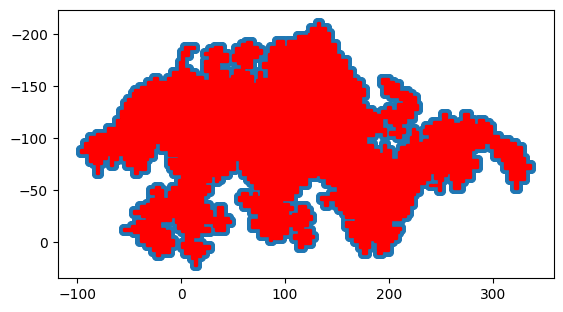

In [4]:
import matplotlib.pyplot as plt
plt.scatter([p[1] for p in points], [p[0] for p in points], s=30)
plt.scatter([p[1] for p in internal_points], [p[0] for p in internal_points], s=2, color='red')

# same scale for x and y
plt.gca().set_aspect('equal', adjustable='box')
# y axis inverted
plt.gca().invert_yaxis()

## Part 2

In [5]:
def transform(L):
    newL = []
    for line in L:
        _, _, c = line.split()
        d = str(int(c[2:-2], base=16))
        intdir = c[-2]
        newL.append(" ".join([intdir, d, c]))
    return newL

In [6]:
L = transform(data_test)

points, corners = get_border_corners(L, intdir=True)
len(points), len(corners)

(6405262, 14)